In [14]:
import nexradaws
import tempfile
import os
import shutil
import pyart
from matplotlib import pyplot as plt
#import six

In [18]:
templocation = tempfile.mkdtemp()
conn = nexradaws.NexradAwsInterface()
scans = conn.get_avail_scans('2011', '05', '20','KTLX')


In [24]:
scans[10:20]

[<AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_004418_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_004832_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_005247_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_005703_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_010118_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_010532_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_010947_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_011401_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_011817_V03.gz>,
 <AwsNexradFile object - 2011/05/20/KTLX/KTLX20110520_012233_V03.gz>]

In [20]:
lcn = templocation
localfiles = conn.download(scans[10:20],lcn)

Downloaded KTLX20110520_004418_V03.gz
Downloaded KTLX20110520_010532_V03.gz
Downloaded KTLX20110520_010118_V03.gz
Downloaded KTLX20110520_004832_V03.gz
Downloaded KTLX20110520_005703_V03.gz
Downloaded KTLX20110520_010947_V03.gz
Downloaded KTLX20110520_005247_V03.gz
Downloaded KTLX20110520_011817_V03.gz
Downloaded KTLX20110520_011401_V03.gz
Downloaded KTLX20110520_012233_V03.gz
10 out of 10 files downloaded...0 errors


In [21]:
radar = pyart.io.read(localfiles.success[0].filepath)

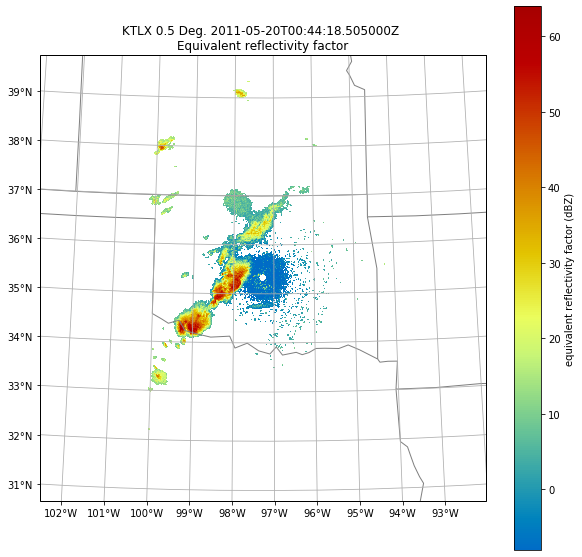

In [25]:
myf = plt.figure(figsize=[10,10])
myd = pyart.graph.RadarMapDisplay(radar)
myd.plot_ppi_map('reflectivity', 0, vmin=-8, vmax=64)